# Bike Sharing Assignment

## Problem Statement
A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

BoomBikes, a bike-sharing service in the United States, aspires to understand the demand for shared bikes among the people and the factors affecting the demand for these shared bikes.

## Business Objective
The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Importing required libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

Read data from provided csv file

In [2]:
bike_df = pd.read_csv("day.csv")

Check the top 5 records

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Shape of the dataset

In [4]:
bike_df.shape

(730, 16)

Description of the dataset

In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Basic info of the dataset

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

Check for Null values

In [7]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Check for Duplicates

In [8]:
bike_df.drop_duplicates(inplace=True)
bike_df.shape

(730, 16)

Dropping unnecessary variables

- variable 'instant' is row index, will not impact target
- variable 'casual' & 'registered' as 'cnt' column is sum of both and is the target column
- variable 'dteday' as we have month and weekday features to work with

In [9]:
bike_df.drop(['instant'], axis=1, inplace=True)
bike_df.drop(['dteday'], axis=1, inplace=True)
bike_df.drop(['casual'], axis=1, inplace=True)
bike_df.drop(['registered'], axis=1, inplace=True)

Checking data after dropping columns

In [10]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Checking for unique values

In [11]:
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Plotting box plots for continuous variables

Plotting temp

<AxesSubplot:ylabel='temp'>

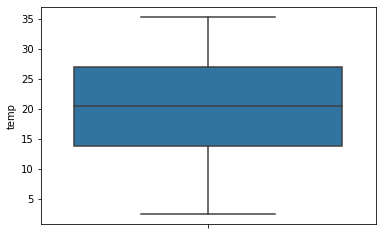

In [12]:
sns.boxplot(y=bike_df['temp'], data=bike_df)

Plotting atemp

<AxesSubplot:ylabel='atemp'>

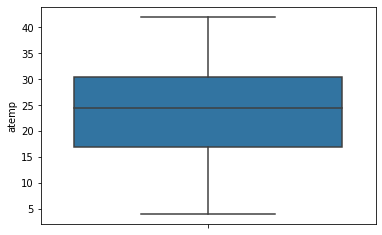

In [13]:
sns.boxplot(y=bike_df['atemp'], data=bike_df)

Plotting windspeed

<AxesSubplot:ylabel='windspeed'>

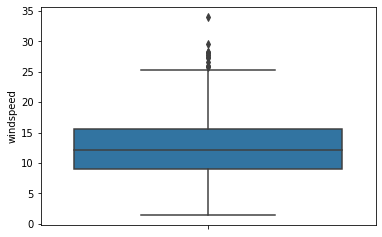

In [14]:
sns.boxplot(y=bike_df['windspeed'], data=bike_df)

In [15]:
bike_df['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [16]:
print("Windspeed at 95%: ", bike_df['windspeed'].quantile(0.95))
print("Windspeed at 97%: ", bike_df['windspeed'].quantile(0.97))
print("Windspeed at 99%: ", bike_df['windspeed'].quantile(0.99))
print("Windspeed at 100%: ", bike_df['windspeed'].quantile(1.00))

Windspeed at 95%:  22.9999878
Windspeed at 97%:  23.99916684
Windspeed at 99%:  27.380947620000004
Windspeed at 100%:  34.000021


Removing Outliers

In [17]:
bike_df = bike_df[~(bike_df['windspeed'] > 28)]

<AxesSubplot:ylabel='windspeed'>

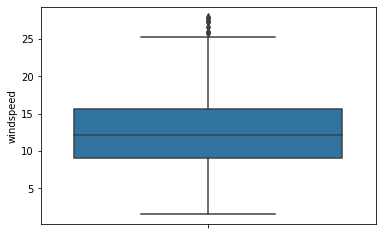

In [18]:
sns.boxplot(y=bike_df['windspeed'], data=bike_df)

Plotting humidity

<AxesSubplot:ylabel='hum'>

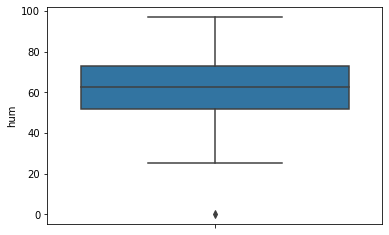

In [19]:
sns.boxplot(y=bike_df['hum'], data=bike_df)

In [20]:
bike_df['hum'].describe()

count    726.000000
mean      62.864776
std       14.154791
min        0.000000
25%       52.052075
50%       62.708350
75%       73.031275
max       97.250000
Name: hum, dtype: float64

In [21]:
print("Humidity at 3%: ", bike_df['hum'].quantile(0.03))
print("Humidity at 2%: ", bike_df['hum'].quantile(0.02))
print("Humidity at 1%: ", bike_df['hum'].quantile(0.01))
print("Humidity at 0%: ", bike_df['hum'].quantile(0.00))

Humidity at 3%:  38.813874999999996
Humidity at 2%:  36.020849999999996
Humidity at 1%:  31.421225
Humidity at 0%:  0.0


Dropping Outliers

In [22]:
bike_df = bike_df[~(bike_df['hum'] < 31)]

<AxesSubplot:ylabel='hum'>

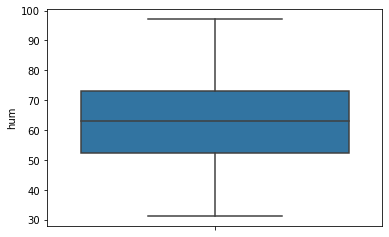

In [23]:
sns.boxplot(y=bike_df['hum'], data=bike_df)

Mapping Season numeric values with meaningful labels

In [24]:
bike_df['season'] = bike_df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

Mapping Weather situation numeric values with meaningful labels

In [25]:
bike_df['weathersit'] = bike_df['weathersit'].map({1: "Clear", 2: "Misty", 3: "LightSnow or Rain", 4: "HeavySnow or Rain"})

Mapping Month numeric values with meaningful labels

In [26]:
bike_df['mnth'] = bike_df['mnth'].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 7: "July", 8: "Aug", 9: "Sept", 10 : "Oct", 11: "Nov", 12 : "Dec"})

Mapping Weekday numeric values with meaningful labels

In [27]:
bike_df['weekday'] = bike_df['weekday'].map({0: "Sun", 1: "Mon", 2: "Tues", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

Checking data after updating data

In [28]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Plotting pair plots to check the relationship

<Figure size 1080x2160 with 0 Axes>

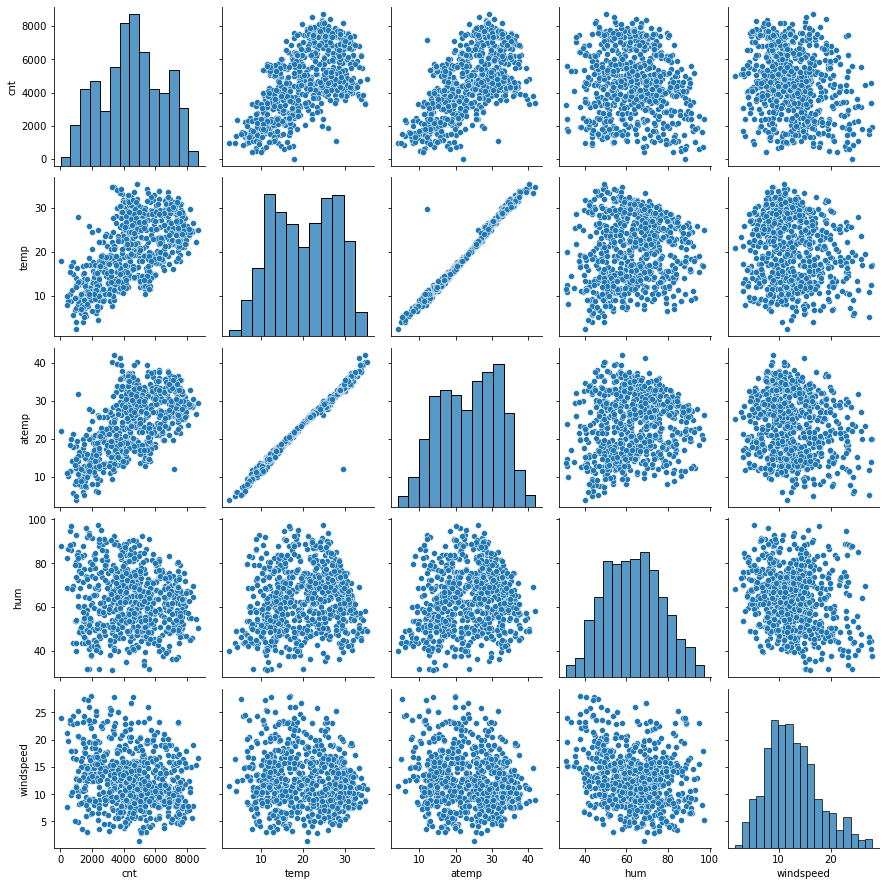

In [29]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Plotting box plots to check the relationship

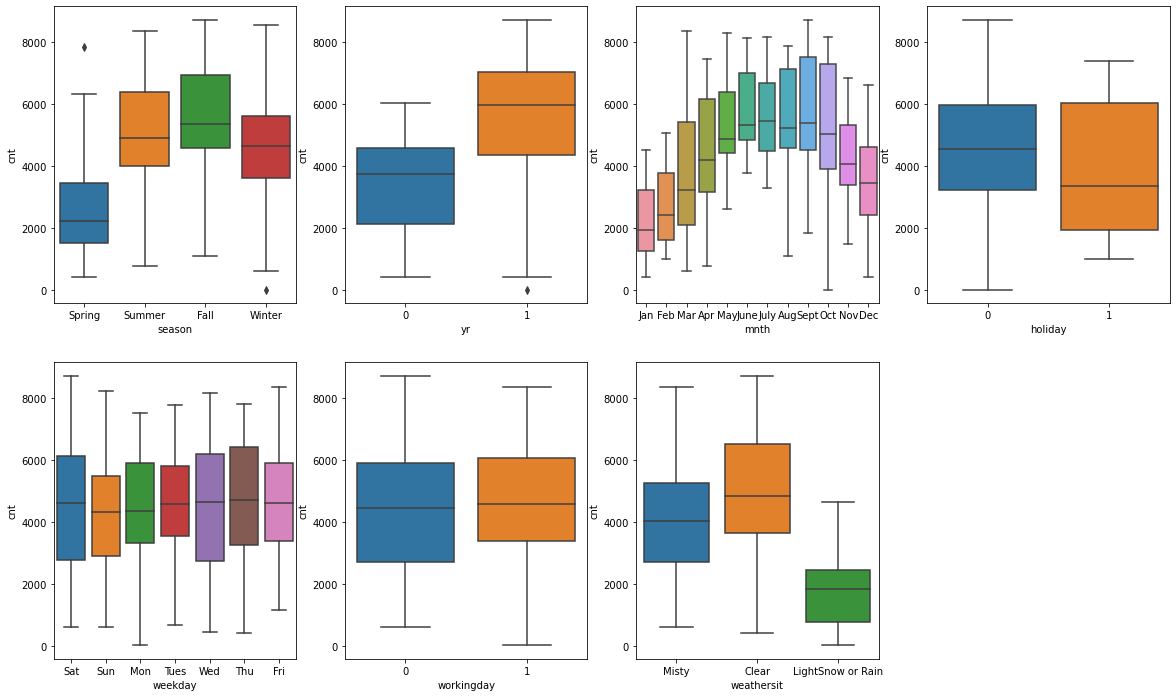

In [30]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

Checking Correlation

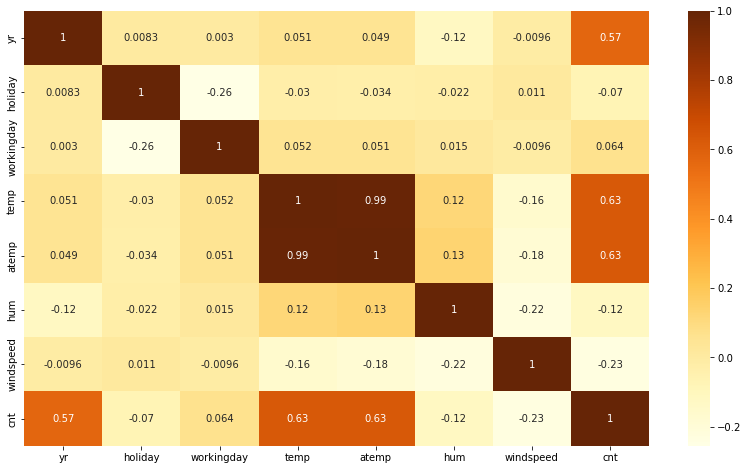

In [31]:
plt.figure(figsize = (14,8))
sns.heatmap(bike_df.corr(), annot = True, cmap = "YlOrBr")
plt.show()

## Observations from EDA

- variables 'temp' and 'atemp' are strongly correlated
- 2019 year shows relatively good demand for shared bikes compared to the 2018 year
- 'Fall' season has more demand for shared bikes and 'Spring' season has lesser demand
- Demand seems to relatively high in the month of 'September'and low for the month of 'January'
- Demand for shared bikes is typically high in the mid of the year and is relatively low towards the beginning and end of the year
- Demand for shared bikes is comparatively less for Sundays when compared with other weekdays
- If the weather is 'Clear', then the demand for shared bikes is high

## Model Building

temp and atemp are strongly correlated, dropping atemp to avoid multicollinearity

In [32]:
bike_df = bike_df.drop("atemp", axis = 1)

In [33]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


Dummy Variables

In [34]:
bike_df = pd.get_dummies(data=bike_df,columns=['season','mnth','weekday', 'weathersit'],drop_first=True)
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tues', 'weekday_Wed', 'weathersit_LightSnow or Rain',
       'weathersit_Misty'],
      dtype='object')

Splitting data into training and testing sets

In [35]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.70, test_size = 0.30, random_state = 100)
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_LightSnow or Rain,weathersit_Misty
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.504970,0.031809,0.685885,20.174324,64.023739,12.406091,4492.807157,0.238569,0.242545,0.252485,...,0.081511,0.089463,0.155070,0.145129,0.137177,0.141153,0.141153,0.147117,0.025845,0.369781
std,0.500473,0.175666,0.464625,7.462497,13.890668,5.013312,1988.217896,0.426633,0.429049,0.434870,...,0.273891,0.285695,0.362331,0.352582,0.344377,0.348526,0.348526,0.354575,0.158830,0.483226
min,0.000000,0.000000,0.000000,2.424346,31.416700,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.632500,53.625000,8.791941,3029.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.158347,64.208300,11.707982,4539.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,73.791650,15.312984,6048.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,27.833743,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Rescaling features using MinMaxScaler

In [36]:
num_vars = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_LightSnow or Rain,weathersit_Misty
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.504970,0.031809,0.685885,0.547983,0.495297,0.414143,0.514359,0.238569,0.242545,0.252485,...,0.081511,0.089463,0.155070,0.145129,0.137177,0.141153,0.141153,0.147117,0.025845,0.369781
std,0.500473,0.175666,0.464625,0.230384,0.210998,0.190378,0.228741,0.426633,0.429049,0.434870,...,0.273891,0.285695,0.362331,0.352582,0.344377,0.348526,0.348526,0.354575,0.158830,0.483226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346021,0.337341,0.276898,0.345950,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.547489,0.498101,0.387633,0.519673,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.752120,0.643670,0.524531,0.693281,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Defining independent and dependent variables for model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

Using Linear Regression for its compatability with RFE

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Running RFE with output numbers of variables as 20

In [39]:
rfe = RFE(lr, 20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

Printing list of RFE rankings

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 9),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 6),
 ('weekday_Tues', False, 4),
 ('weekday_Wed', False, 5),
 ('weathersit_LightSnow or Rain', True, 1),
 ('weathersit_Misty', True, 1)]

Checking selected and dropped columns

In [41]:
cols_selected = X_train.columns[rfe.support_]
print(cols_selected)

cols_dropped = X_train.columns[~rfe.support_]
print(cols_dropped)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty'],
      dtype='object')
Index(['season_Summer', 'mnth_Feb', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')


Function to create linear model using statsmodels

In [42]:
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

Function to calculate VIF and print values

In [43]:
def calculate_VIF(X_train_sm):
    vif = pd.DataFrame()
    vif['Features'] = X_train_sm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Building model using statsmodel

In [44]:
lm_1 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          7.79e-182
Time:                        17:29:43   Log-Likelihood:                 498.15
No. Observations:                 503   AIC:                            -956.3
Df Residuals:                     483   BIC:                            -871.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
2,workingday,34.20
16,weekday_Sat,7.88
17,weekday_Sun,7.51
3,temp,5.52
6,season_Spring,2.96
1,holiday,2.64
7,season_Winter,2.49
4,hum,2.22
11,mnth_July,2.03
8,mnth_Aug,1.86


p-value for the feature holiday = 0.834 which is greater than the significance level of alpha = 0.05

Drop holiday column and re-evaluate

In [45]:
cols_selected = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_2 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          7.79e-182
Time:                        17:29:43   Log-Likelihood:                 498.15
No. Observations:                 503   AIC:                            -956.3
Df Residuals:                     483   BIC:                            -871.9
Df Model:                          19                                         
Covariance Type:         

,Features,VIF
2,temp,25.35
3,hum,13.98
1,workingday,13.92
4,windspeed,5.89
15,weekday_Sat,3.69
16,weekday_Sun,3.56
5,season_Spring,3.22
6,season_Winter,3.12
18,weathersit_Misty,2.74
10,mnth_July,2.15


p-value for the feature mnth_Jan = 0.150 which is greater than the significance level of alpha = 0.05

Drop mnth_Jan column and re-evaluate

In [46]:
cols_selected = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_3 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     146.2
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.78e-182
Time:                        17:29:43   Log-Likelihood:                 497.08
No. Observations:                 503   AIC:                            -956.2
Df Residuals:                     484   BIC:                            -876.0
Df Model:                          18                                         
Covariance Type:            nonrobust

,Features,VIF
2,temp,23.88
1,workingday,13.72
3,hum,13.63
4,windspeed,5.83
14,weekday_Sat,3.64
15,weekday_Sun,3.54
6,season_Winter,3.12
17,weathersit_Misty,2.73
5,season_Spring,2.66
9,mnth_July,2.12


p-value for the feature mnth_June = 0.083 which is greater than the significance level of alpha = 0.05

Drop mnth_June column and re-evaluate

In [47]:
cols_selected = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec',
       'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_4 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     154.0
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.28e-183
Time:                        17:29:43   Log-Likelihood:                 495.51
No. Observations:                 503   AIC:                            -955.0
Df Residuals:                     485   BIC:                            -879.1
Df Model:                          17                                         
Covariance Type:            nonrobust             

,Features,VIF
2,temp,18.75
1,workingday,13.72
3,hum,12.83
4,windspeed,5.64
13,weekday_Sat,3.63
14,weekday_Sun,3.53
6,season_Winter,3.00
16,weathersit_Misty,2.70
5,season_Spring,2.66
0,yr,2.09


p-value for the feature mnth_Aug = 0.052 which is greater than the significance level of alpha = 0.05

Drop mnth_Aug column and re-evaluate

In [48]:
cols_selected = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_5 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          3.19e-183
Time:                        17:29:43   Log-Likelihood:                 493.55
No. Observations:                 503   AIC:                            -953.1
Df Residuals:                     486   BIC:                            -881.3
Df Model:                          16                                         
Covariance Type:            nonrobust                         

,Features,VIF
2,temp,15.89
1,workingday,13.70
3,hum,12.61
4,windspeed,5.55
12,weekday_Sat,3.63
13,weekday_Sun,3.53
6,season_Winter,2.94
15,weathersit_Misty,2.68
5,season_Spring,2.66
0,yr,2.09


No p-values are greater than the significance level of 0.05, Feature 'temp' has the highest VIF of 15.89

Drop temp column and re-evaluate

In [49]:
cols_selected = ['yr', 'workingday', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_6 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'workingday', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.31e-151
Time:                        17:29:43   Log-Likelihood:                 415.21
No. Observations:                 503   AIC:                            -798.4
Df Residuals:                     487   BIC:                            -730.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                 

,Features,VIF
2,hum,10.04
1,workingday,9.38
3,windspeed,5.25
11,weekday_Sat,2.84
12,weekday_Sun,2.79
5,season_Winter,2.73
14,weathersit_Misty,2.49
0,yr,1.99
9,mnth_Nov,1.82
4,season_Spring,1.75


R-Squared and Adjusted R-Squared values decreased after removing the feature 'temp' So, instead of dropping 'temp', dropping the feature 'workingday' which has the highest VIF value of 13.70 (model 5)
 
Add temp, remove workingday and re-evaluate

In [50]:
cols_selected = ['yr', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_7 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.17e-181
Time:                        17:29:43   Log-Likelihood:                 485.39
No. Observations:                 503   AIC:                            -938.8
Df Residuals:                     487   BIC:                            -871.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                       

,Features,VIF
2,hum,12.02
1,temp,10.88
3,windspeed,4.98
5,season_Winter,2.70
14,weathersit_Misty,2.67
4,season_Spring,2.12
0,yr,2.07
9,mnth_Nov,1.84
6,mnth_Dec,1.48
7,mnth_July,1.43


p-value for the feature weekday_Sat = 0.290 is greater than the significance level of alpha = 0.05

Drop weekday_Sat column and re-evaluate

In [51]:
cols_selected = ['yr', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_8 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          7.90e-182
Time:                        17:29:43   Log-Likelihood:                 484.81
No. Observations:                 503   AIC:                            -939.6
Df Residuals:                     488   BIC:                            -876.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
            

,Features,VIF
2,hum,12.01
1,temp,10.88
3,windspeed,4.93
5,season_Winter,2.70
13,weathersit_Misty,2.67
4,season_Spring,2.11
0,yr,2.07
9,mnth_Nov,1.84
6,mnth_Dec,1.48
7,mnth_July,1.42


No p-values are greater than the significance level of 0.05, Feature 'hum' has the highest VIF of 12.01

Drop hum column and re-evaluate

In [52]:
cols_selected = ['yr', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_9 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_July', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.83e-177
Time:                        17:29:44   Log-Likelihood:                 471.69
No. Observations:                 503   AIC:                            -915.4
Df Residuals:                     489   BIC:                            -856.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   

,Features,VIF
1,temp,5.42
2,windspeed,4.87
4,season_Winter,2.55
0,yr,2.05
3,season_Spring,1.83
8,mnth_Nov,1.83
12,weathersit_Misty,1.62
5,mnth_Dec,1.44
6,mnth_July,1.39
9,mnth_Sept,1.25


p-value of mnth_July and VIF value of temp are close to 0.05 and 5 values.

Dropping mnth_July and re-evaluate

In [53]:
cols_selected = ['yr', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_Mar', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sun', 'weathersit_LightSnow or Rain',
       'weathersit_Misty']
print(cols_selected)

lm_10 = create_model(cols_selected)
calculate_VIF(X_train[cols_selected])

['yr', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Mar', 'mnth_Nov', 'mnth_Sept', 'weekday_Sun', 'weathersit_LightSnow or Rain', 'weathersit_Misty']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.14e-177
Time:                        17:29:44   Log-Likelihood:                 469.43
No. Observations:                 503   AIC:                            -912.9
Df Residuals:                     490   BIC:                            -858.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                

,Features,VIF
2,windspeed,4.78
1,temp,4.42
4,season_Winter,2.51
0,yr,2.05
3,season_Spring,1.83
7,mnth_Nov,1.83
11,weathersit_Misty,1.61
5,mnth_Dec,1.44
6,mnth_Mar,1.21
8,mnth_Sept,1.20


- No p - values of the features are greater than the significance level of alpha = 0.05
- For Model 10, VIF values of all the predictors are also less than 5
- R - Squared (0.827) and Adjusted R - Squared (0.822) values are also above 80%, which is a good score for a linear regression model
- Prob (F-statistic): 1.14e-177 is very low, which implies that the overall significance is good

Build the final linear regression model 

In [54]:
X_train_final = X_train[cols_selected]

lr = LinearRegression()
lr.fit(X_train_final, y_train)
print("Intercept value : ",lr.intercept_,"\n")
j=0
columns = X_train_final.columns
for i in columns:
    print("Coefficient of ",i," : ",lr.coef_[j])
    j+=1

Intercept value :  0.3021286132157105 

Coefficient of  yr  :  0.23490146969492473
Coefficient of  temp  :  0.3762783467401452
Coefficient of  windspeed  :  -0.11988516541245431
Coefficient of  season_Spring  :  -0.13978168976979
Coefficient of  season_Winter  :  0.06866052878457299
Coefficient of  mnth_Dec  :  -0.04710824301899253
Coefficient of  mnth_Mar  :  0.04848664299665752
Coefficient of  mnth_Nov  :  -0.07255471615652603
Coefficient of  mnth_Sept  :  0.045924975955338905
Coefficient of  weekday_Sun  :  -0.044036012353460025
Coefficient of  weathersit_LightSnow or Rain  :  -0.3054846481664926
Coefficient of  weathersit_Misty  :  -0.08166570146180938


## Residual Analysis

In [55]:
y_train_pred = lr.predict(X_train_final)

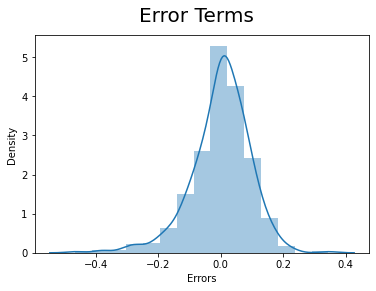

In [56]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 10)                         
plt.show()

Error terms are normally distributed with mean 0.0

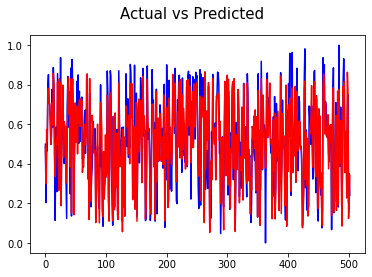

In [57]:
# Actual vs Predicted
c = [i for i in range(0, len(X_train_final), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

Actual values and Predicted values are following almost similar pattern

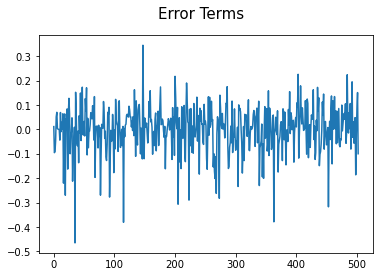

In [58]:
c = [i for i in range(0, len(X_train_final), 1)]
plt.plot(c, y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.show()

Error terms are independent

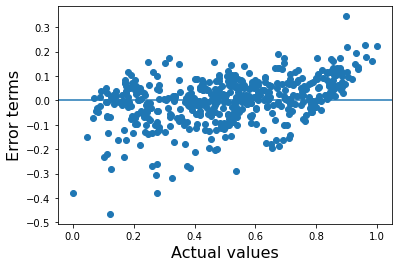

In [59]:
plt.scatter(y_train, y_train-y_train_pred)
plt.axhline(0)
fig.suptitle('Actual values vs Residuals', fontsize = 18)             
plt.xlabel('Actual values', fontsize = 16)                          
plt.ylabel('Error terms', fontsize = 16)   
plt.show()

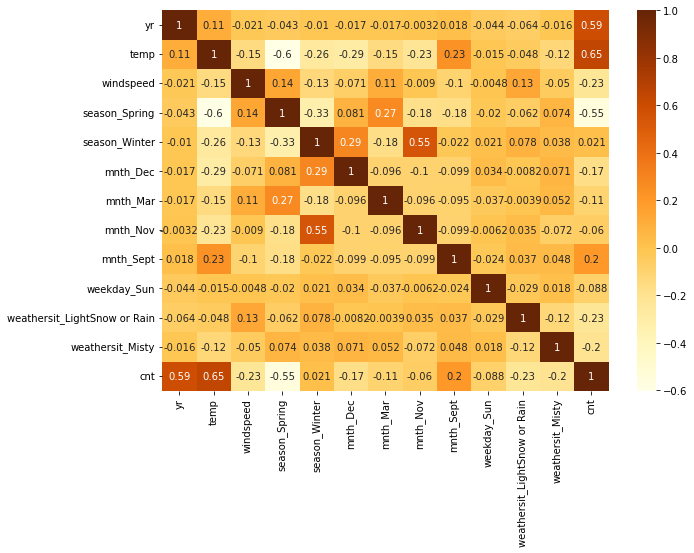

In [60]:
df = pd.concat([X_train_final, bike_df['cnt']], axis = 1)
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, cmap = "YlOrBr")
plt.show()

## Predictions using final model

Rescale features of test set

In [61]:
scale_vars = ['temp','hum','windspeed','cnt']
df_test[scale_vars] = scaler.transform(df_test[scale_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_LightSnow or Rain,weathersit_Misty
202,0,0,1,0.998944,0.404431,0.281674,0.387138,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,1,0,0,0.700435,0.398101,0.515792,0.701335,0,1,0,...,0,0,0,0,1,0,0,0,0,0
370,1,0,1,0.348131,0.346202,0.370235,0.468937,1,0,0,...,0,0,0,0,0,0,0,0,0,0
630,1,0,0,0.594955,0.232278,0.511062,0.907156,0,0,1,...,0,1,0,0,1,0,0,0,0,0
646,1,0,1,0.490530,0.679747,0.427207,0.732858,0,0,1,...,1,0,0,0,0,0,1,0,0,1


Making predictions with final model

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test_new = X_test[X_train_final.columns]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lm_10.predict(X_test_new)

Plotting y_test and y_test_pred

Text(0, 0.5, 'y_test_pred')

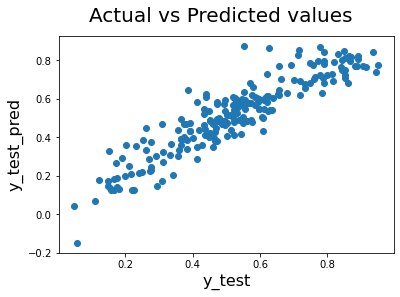

In [63]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted values', fontsize = 20)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16)  

Check R squared values of actual predicted values of train set and test set

In [64]:
print("R - squared value for train set : ",r2_score(y_train,y_train_pred))
print("R - squared value for test set : ",r2_score(y_test,y_test_pred))

R - squared value for train set :  0.8265885420027226
R - squared value for test set :  0.83266680206719


R - squared values of the test set (83.26%) and train set (82.65%) are significantly good

Check RMSE value

In [65]:
print("Root Mean Squared Error of the model is given by : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error of the model is given by :  0.08455913477330076


RMSE of our model is very flow, model fit is good

## Conclusion

### Significant Variables coefficients

Intercept value :  0.3021286132157105 <br>
Coefficient of  yr  :  0.23490146969492473 <br>
Coefficient of  temp  :  0.3762783467401452 <br>
Coefficient of  windspeed  :  -0.11988516541245431 <br>
Coefficient of  season_Spring  :  -0.13978168976979 <br>
Coefficient of  season_Winter  :  0.06866052878457299 <br>
Coefficient of  mnth_Dec  :  -0.04710824301899253 <br>
Coefficient of  mnth_Mar  :  0.04848664299665752 <br>
Coefficient of  mnth_Nov  :  -0.07255471615652603 <br>
Coefficient of  mnth_Sept  :  0.045924975955338905 <br>
Coefficient of  weekday_Sun  :  -0.044036012353460025 <br>
Coefficient of  weathersit_LightSnow or Rain  :  -0.3054846481664926 <br>
Coefficient of  weathersit_Misty  :  -0.08166570146180938 <br>

### Linear equation

COUNT = (0.23490146969492473 * YEAR) + (0.3762783467401452 * TEMP) + (-0.11988516541245431 * WINDSPEED) + <br>
        &emsp; &emsp;(-0.13978168976979 * SPRING) + (0.06866052878457299 * WINTER) + (-0.04710824301899253 * DECEMBER) + <br>
        &emsp; &emsp;(0.04848664299665752 * MARCH) + (-0.07255471615652603 * NOVEMBER) + (0.045924975955338905 * SEPTEMBER) + <br>
        &emsp; &emsp;(-0.044036012353460025 * SUNDAY) + (-0.3054846481664926 * LIGHT SNOW OR RAIN) + (-0.08166570146180938 * MISTY)

## Significant features to predict the DEMAND for shared bikes are :

1. Season (Spring, Winter)
2. Weather (Light Snow or Rain, Misty)
3. Month (March, September, November, December)
4. Temperature
5. Year
6. Windspeed
7. Weekday (Sunday)